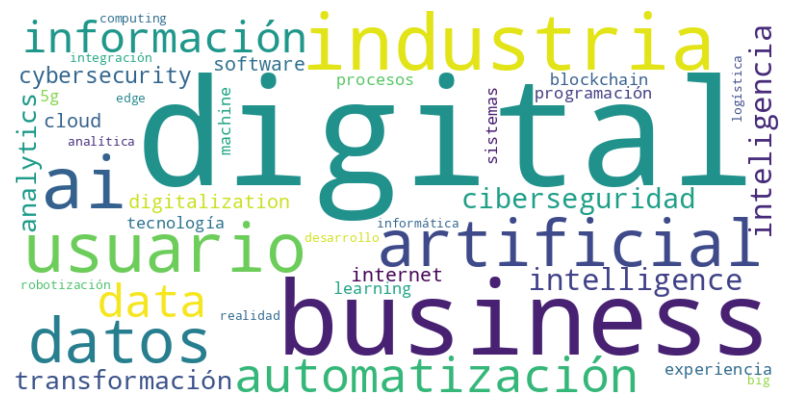

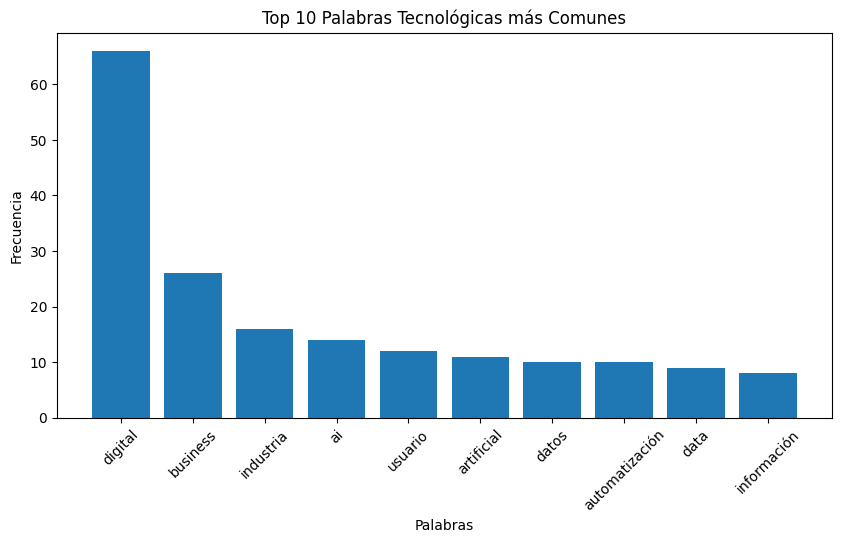

In [8]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string

# Lista ampliada de palabras clave tecnológicas en español e inglés
tech_keywords = set([
    'inteligencia', 'artificial', 'automatización', 'ciberseguridad', 'big', 'data', 
    'cloud', 'nube', 'machine', 'learning', 'internet', 'iot', 'seguridad', 'digital', 
    'tecnología', 'blockchain', 'criptografía', 'software', 'hardware', 'redes', 
    'servidores', 'algoritmos', 'programación', 'desarrollo', 'informática', 'computación',
    'datos', 'análisis', 'analítica', 'procesos', 'automatizados', 'deep', 'learning', 
    'realidad', 'virtual', 'aumentada', 'sistemas', 'información', 'transformación', 
    'digital', 'computación', 'cuántica', '5g', 'robotización', 'cloud', 'computing', 
    'inteligencia', 'empresarial', 'business', 'intelligence', 'analytics', 'procesamiento', 
    'natural', 'lenguaje', 'biometría', 'interfaces', 'chatbots', 'robotización', 'virtualización',
    'infraestructura', 'automatización', 'inteligencia', 'artificial', 'deep', 'learning', 
    'big', 'data', 'cloud', 'cybersecurity', 'cloud', 'computing', 'edge', 'computing', 
    'microservicios', 'contenedores', 'api', 'integración', 'devops', 'agile', 'transformación',
    'cloud', 'multi-cloud', 'ci/cd', 'blockchain', 'criptomonedas', 'criptografía', 'rpa', 
    'automatización', 'procesos', 'industrias', '4.0', 'industria', '4.0', 'logística', 'digital',
    'experiencia', 'usuario', 'ux', 'ai', 'robotics', 'digitalization', 'cybersecurity', 'iot', 
    'big data', 'cloud computing', 'machine learning', 'deep learning', 'augmented reality', 
    'virtual reality', 'rpa', 'blockchain', 'quantum computing'
])

# Función para limpiar el texto y extraer palabras
def clean_text(text):
    # Convertir a minúsculas y eliminar puntuación
    text = text.lower()
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    
    # Separar en palabras
    words = text.split()
    return words

# Función para obtener el contenido real de la página
def get_text_from_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    return soup.get_text(separator=' ')

# URLs de los eventos tecnológicos en España
urls = [
    "https://www.des-madrid.com/",
    "https://www.southsummit.co/",
    "https://www.4yfn.com/",
    "https://www.advancedfactories.com/",
    "https://www.smartcityexpo.com/",
    "https://potencialdigital.es/"
    "https://www.dcd.events/conferences/madrid"
]

# Procesar cada URL
all_tech_words = []
for url in urls:
    # Obtener el texto real de la página
    text = get_text_from_url(url)
    
    # Limpiar y procesar el texto
    words = clean_text(text)
    
    # Filtrar solo las palabras tecnológicas
    tech_words = [word for word in words if word in tech_keywords]
    all_tech_words.extend(tech_words)

# Contar frecuencias de todas las palabras tecnológicas
tech_word_counts = Counter(all_tech_words)

# Generar la nube de palabras tecnológicas
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(tech_word_counts)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Mostrar las 10 palabras más comunes en un gráfico de barras
most_common_words = tech_word_counts.most_common(10)

words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras Tecnológicas más Comunes')
plt.xticks(rotation=45)
plt.show()
